# Assignment 1: Fashion MNIST Classification

Name: Pratik Naik <br>
Course: Introduction to Deep Learning (CS672) <br>
CRN: 23203 <br>
Term: Spring 2025

## Importing Libraries

In [140]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

## Load the Fashion MNIST Dataset

In [143]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


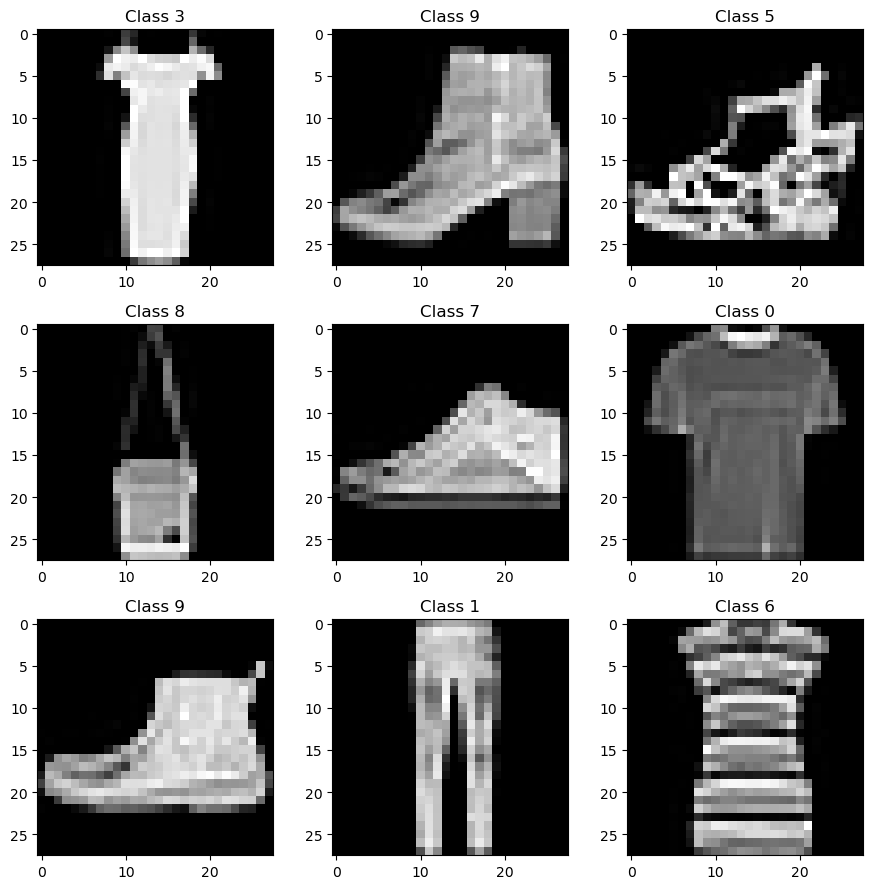

In [145]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [147]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!
matprint(X_train[num])

0  0  0  0  0  0    0    0    0   28  144  189   96   54   54   65   59  118  173   53    0    0    0    0  0  0  0  0  
0  0  0  0  0  0    9  107  185  222  212  172   70   99  154  147   73  137  216  219  219  157   50    0  0  0  0  0  
0  0  0  0  0  6  163  157  155  143  148  169  151   96   75   80  126  188  153  144  151  164  186  108  0  0  0  0  
0  0  0  0  0  0  136  172   84   91   73   38   28   59   30   21   66   40   50   92  100  103  170  125  0  0  0  0  
0  0  0  0  0  0    2   47   65   95  133  205  214  231  201  185  226  196  155   95   77   42   40    8  0  0  0  0  
0  0  0  0  0  2    0  127  232  207  231  174  160  146  177  169  154  173  207  242  209  225  142    0  0  0  0  0  
0  0  0  0  0  1    0   37  164  122  123  133  153  146  196  207  143  143  123  112  123  184   73    0  0  0  0  0  
0  0  0  0  0  0    0    0  107  216  134   74   63   44   33   44   59   71  115  165  209   81    0    0  0  0  0  0  
0  0  0  0  0  2    3    0   61 

## Formatting the input data layer

Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector.

In [151]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

Normalize the Pixel Value

In [154]:
X_train, X_test = X_train / 255.0, X_test / 255.
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784, 1)
Testing matrix shape (10000, 784, 1)


## Define the model

In [157]:
def create_model(activation='relu', optimizer='adam'):
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(128, activation=activation),
        layers.Dense(64, activation=activation),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [159]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,774 (854.59 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 109,388 (427.30 KB)

## Evaluate Model's Accuracy with different activation functions and optimizers


Training model with activation=relu and optimizer=adam
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7771 - loss: 0.6499 - val_accuracy: 0.8325 - val_loss: 0.4650
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8642 - loss: 0.3748 - val_accuracy: 0.8641 - val_loss: 0.3845
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8742 - loss: 0.3393 - val_accuracy: 0.8506 - val_loss: 0.4036
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8874 - loss: 0.3098 - val_accuracy: 0.8692 - val_loss: 0.3602
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8898 - loss: 0.2947 - val_accuracy: 0.8741 - val_loss: 0.3585
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8964 - loss: 0.2771 - val_accuracy: 0.8724 - val_loss: 0.3520
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9008 - loss: 0.2659 - val_accuracy: 0.8796 - val_loss: 0.3441
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9042 - loss: 0.2514 - val_accurac

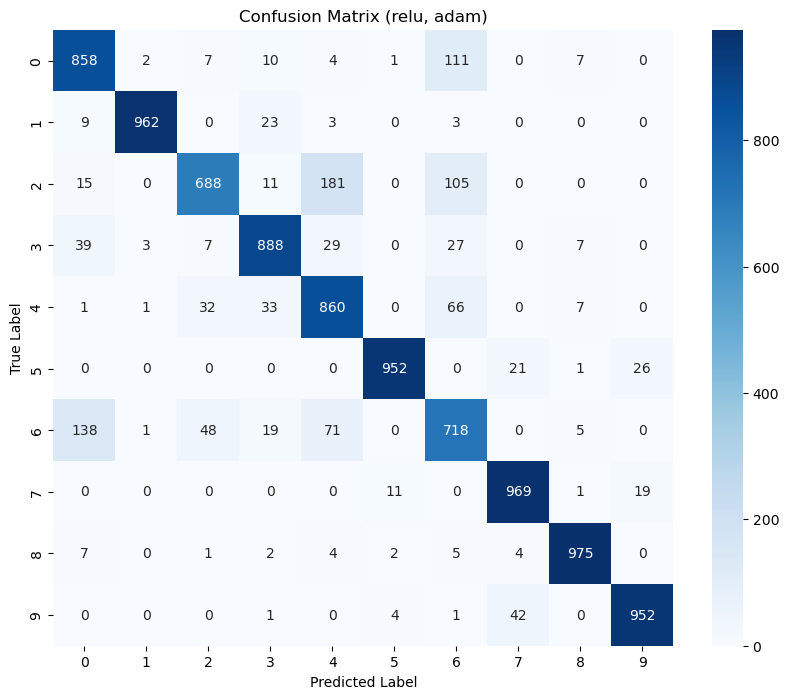

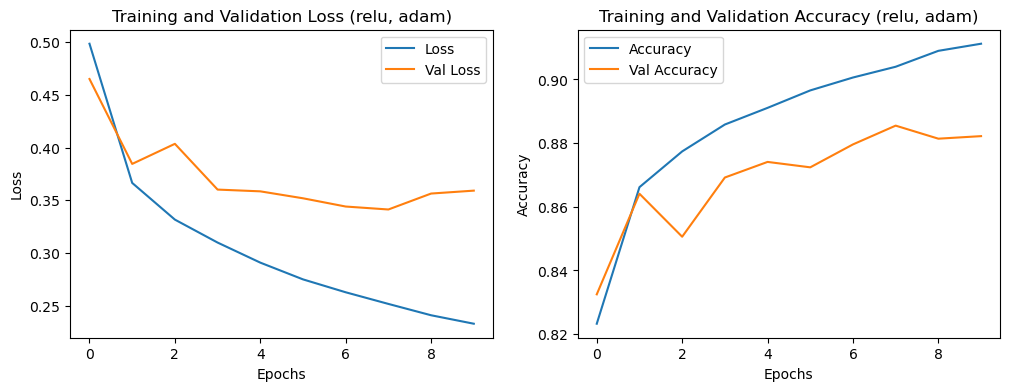


Training model with activation=relu and optimizer=sgd
Epoch 1/10
  71/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 720us/step - accuracy: 0.1992 - loss: 2.1384  

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 776us/step - accuracy: 0.6537 - loss: 1.0538 - val_accuracy: 0.8095 - val_loss: 0.5491
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 832us/step - accuracy: 0.8207 - loss: 0.5193 - val_accuracy: 0.8283 - val_loss: 0.4862
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - accuracy: 0.8388 - loss: 0.4644 - val_accuracy: 0.8361 - val_loss: 0.4658
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 775us/step - accuracy: 0.8482 - loss: 0.4330 - val_accuracy: 0.8410 - val_loss: 0.4422
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - accuracy: 0.8605 - loss: 0.4037 - val_accuracy: 0.8479 - val_loss: 0.4287
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.8637 - loss: 0.3900 - val_accuracy: 0.8517 - val_loss: 0.4125
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step - accuracy: 0.8705 - loss: 0.3714 - val_accuracy: 0.8529 - val_loss: 0.4145
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - accuracy: 0.8698 - loss: 0.36

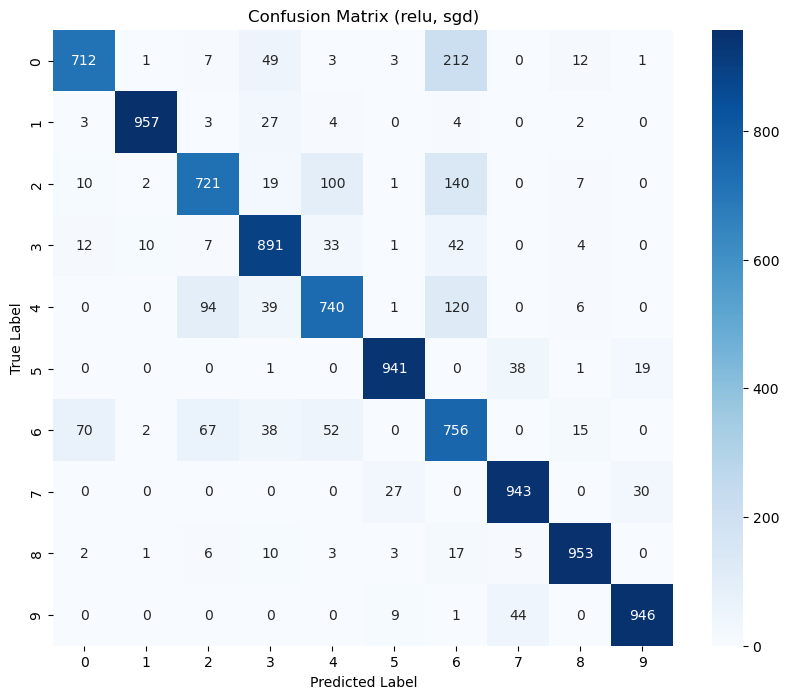

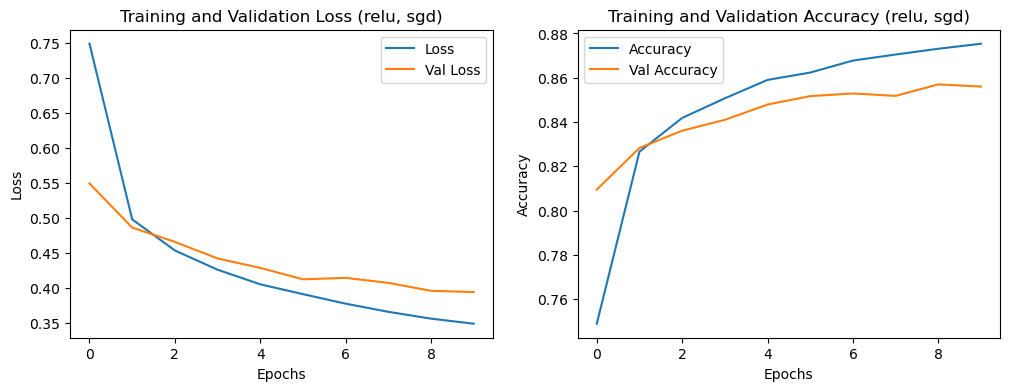


Training model with activation=relu and optimizer=rmsprop
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 980us/step - accuracy: 0.7757 - loss: 0.6385 - val_accuracy: 0.8523 - val_loss: 0.4223
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 961us/step - accuracy: 0.8638 - loss: 0.3800 - val_accuracy: 0.8418 - val_loss: 0.4339
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 950us/step - accuracy: 0.8747 - loss: 0.3496 - val_accuracy: 0.8652 - val_loss: 0.3962
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 942us/step - accuracy: 0.8798 - loss: 0.3356 - val_accuracy: 0.8640 - val_loss: 0.4034
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 946us/step - accuracy: 0.8830 - loss: 0.3291 - val_accuracy: 0.8716 - val_loss: 0.4256
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 973us/step - accuracy: 0.8887 - loss: 0.3130 - val_accuracy: 0.8659 - val_loss: 0.4211
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 977us/step - accuracy: 0.8902 - loss: 0.3116 - val_accuracy: 0.8688 - val_loss: 0.3922
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 948us/step - accuracy: 0.8942 - loss: 0.30

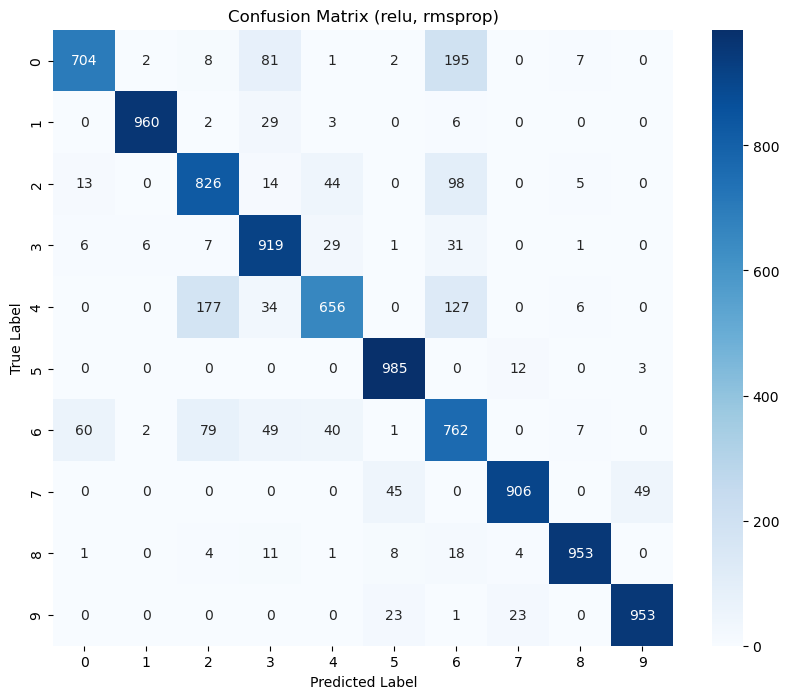

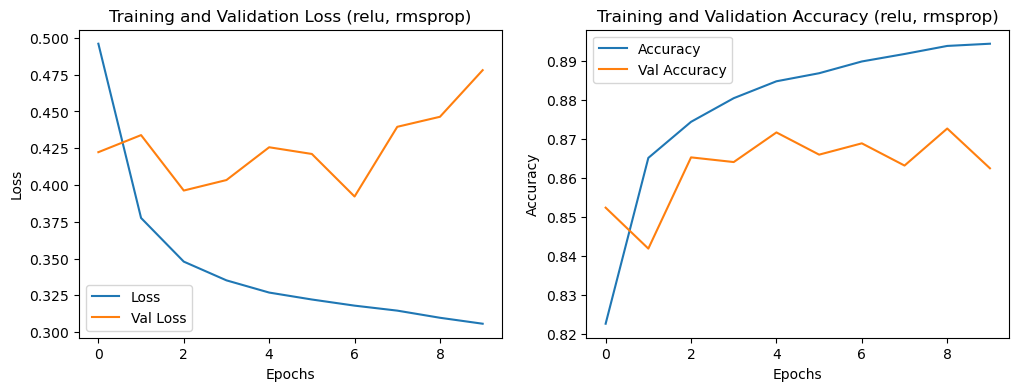


Training model with activation=sigmoid and optimizer=adam
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7135 - loss: 0.9242 - val_accuracy: 0.8266 - val_loss: 0.4811
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8540 - loss: 0.4056 - val_accuracy: 0.8505 - val_loss: 0.4092
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8680 - loss: 0.3600 - val_accuracy: 0.8573 - val_loss: 0.3913
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8783 - loss: 0.3334 - val_accuracy: 0.8680 - val_loss: 0.3670
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8881 - loss: 0.3056 - val_accuracy: 0.8722 - val_loss: 0.3561
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8902 - loss: 0.2992 - val_accuracy: 0.8761 - val_loss: 0.3444
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8952 - loss: 0.2856 - val_accuracy: 0.8693 - val_loss: 0.3599
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9018 - loss: 0.2675 - val_accurac

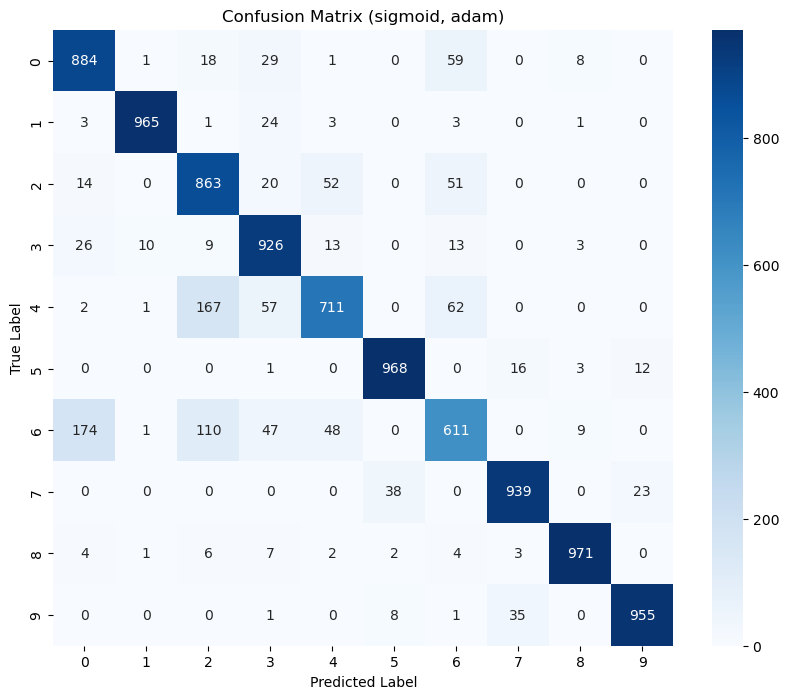

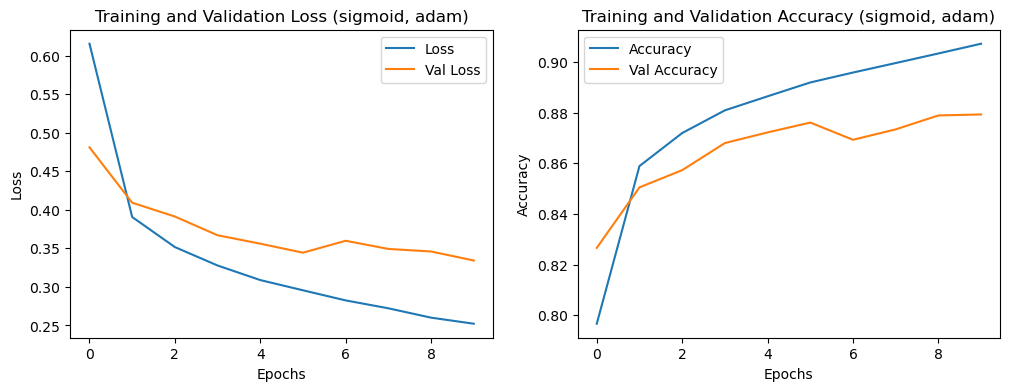


Training model with activation=sigmoid and optimizer=sgd
Epoch 1/10
  43/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0887 - loss: 2.4550    

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 783us/step - accuracy: 0.3535 - loss: 2.1680 - val_accuracy: 0.5618 - val_loss: 1.5488
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.6310 - loss: 1.4018 - val_accuracy: 0.6616 - val_loss: 1.1138
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.6750 - loss: 1.0484 - val_accuracy: 0.6916 - val_loss: 0.9187
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.7076 - loss: 0.8782 - val_accuracy: 0.7133 - val_loss: 0.8078
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - accuracy: 0.7259 - loss: 0.7801 - val_accuracy: 0.7382 - val_loss: 0.7370
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - accuracy: 0.7474 - loss: 0.7098 - val_accuracy: 0.7470 - val_loss: 0.6902
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.7589 - loss: 0.6632 - val_accuracy: 0.7598 - val_loss: 0.6565
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.7664 - loss: 0.63

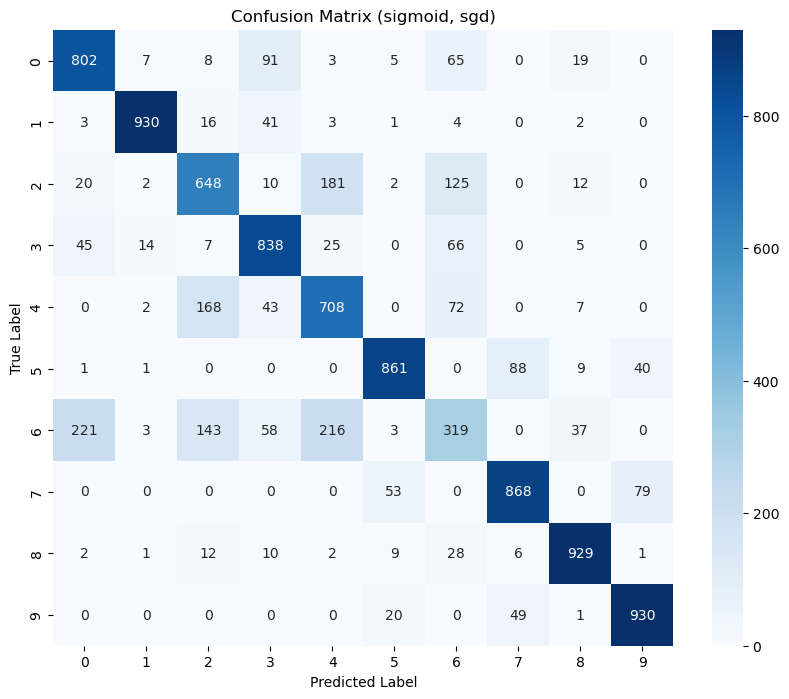

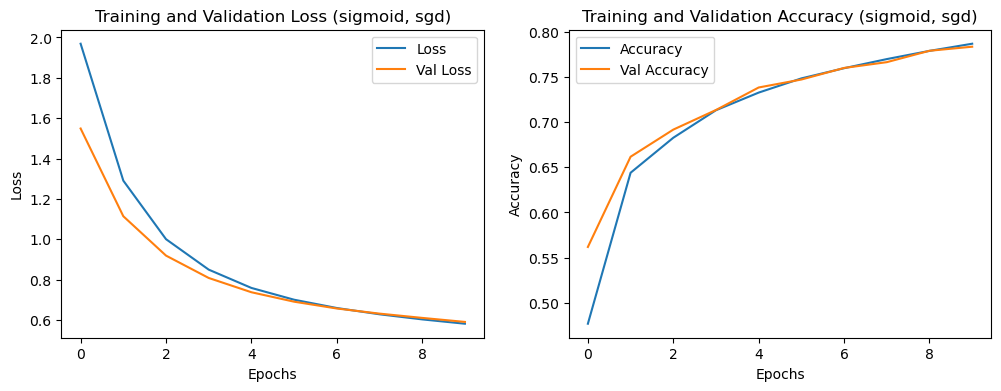


Training model with activation=sigmoid and optimizer=rmsprop
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7135 - loss: 0.8991 - val_accuracy: 0.8353 - val_loss: 0.4616
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 959us/step - accuracy: 0.8482 - loss: 0.4136 - val_accuracy: 0.8495 - val_loss: 0.4167
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 992us/step - accuracy: 0.8650 - loss: 0.3728 - val_accuracy: 0.8580 - val_loss: 0.3953
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 967us/step - accuracy: 0.8748 - loss: 0.3431 - val_accuracy: 0.8694 - val_loss: 0.3675
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - accuracy: 0.8815 - loss: 0.3242 - val_accuracy: 0.8661 - val_loss: 0.3704
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 970us/step - accuracy: 0.8842 - loss: 0.3171 - val_accuracy: 0.8710 - val_loss: 0.3602
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 970us/step - accuracy: 0.8914 - loss: 0.2981 - val_accuracy: 0.8713 - val_loss: 0.3544
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 968us/step - accuracy: 0.8936 - loss: 0.2889

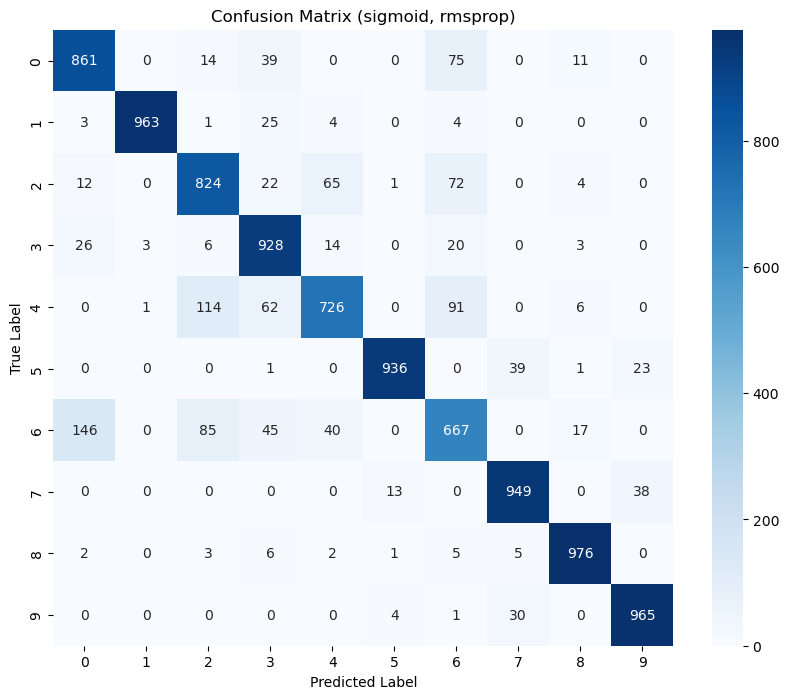

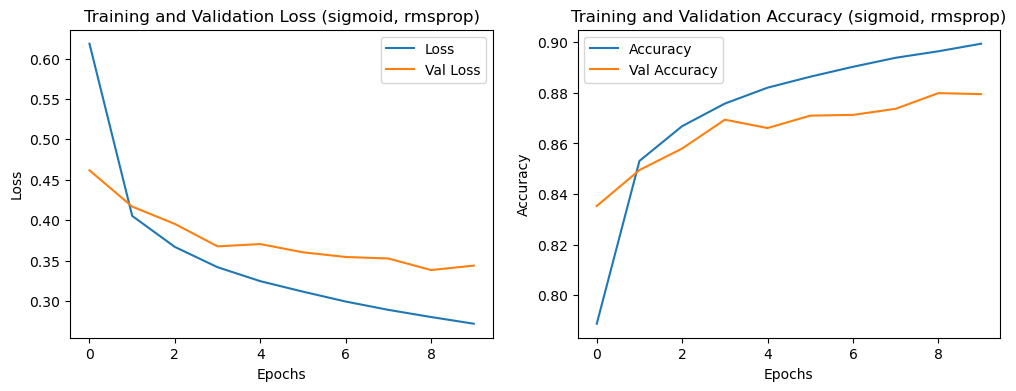


Training model with activation=tanh and optimizer=adam
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7901 - loss: 0.5878 - val_accuracy: 0.8545 - val_loss: 0.4013
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8671 - loss: 0.3637 - val_accuracy: 0.8616 - val_loss: 0.3909
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8763 - loss: 0.3369 - val_accuracy: 0.8684 - val_loss: 0.3617
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8882 - loss: 0.3057 - val_accuracy: 0.8636 - val_loss: 0.3797
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8917 - loss: 0.2917 - val_accuracy: 0.8681 - val_loss: 0.3604
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8941 - loss: 0.2800 - val_accuracy: 0.8656 - val_loss: 0.3678
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8977 - loss: 0.2733 - val_accuracy: 0.8769 - val_loss: 0.3506
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9037 - loss: 0.2562 - val_accurac

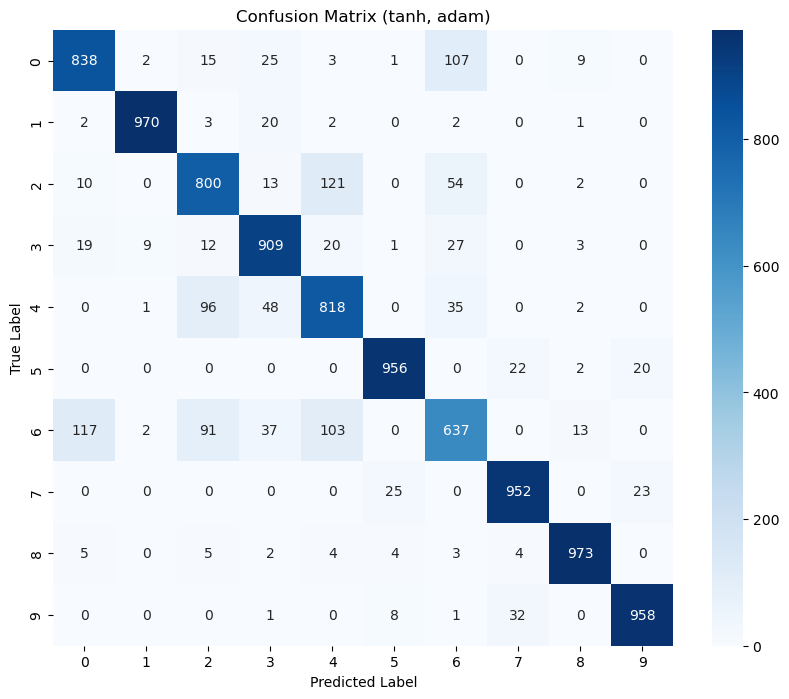

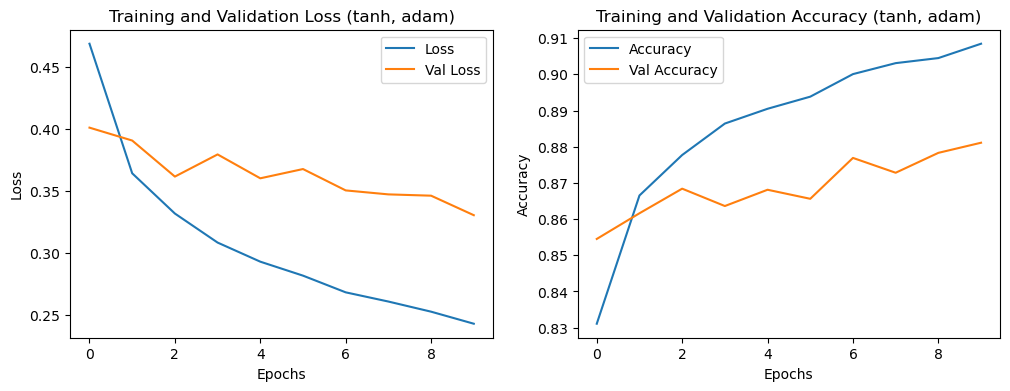


Training model with activation=tanh and optimizer=sgd
Epoch 1/10
  69/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.3006 - loss: 2.0139  

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 768us/step - accuracy: 0.6991 - loss: 0.9478 - val_accuracy: 0.8076 - val_loss: 0.5411
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 768us/step - accuracy: 0.8251 - loss: 0.4986 - val_accuracy: 0.8240 - val_loss: 0.4843
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 739us/step - accuracy: 0.8415 - loss: 0.4454 - val_accuracy: 0.8324 - val_loss: 0.4612
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.8528 - loss: 0.4155 - val_accuracy: 0.8439 - val_loss: 0.4394
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - accuracy: 0.8613 - loss: 0.3939 - val_accuracy: 0.8483 - val_loss: 0.4239
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.8648 - loss: 0.3837 - val_accuracy: 0.8540 - val_loss: 0.4124
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.8662 - loss: 0.3744 - val_accuracy: 0.8539 - val_loss: 0.4093
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - accuracy: 0.8686 - loss: 0.36

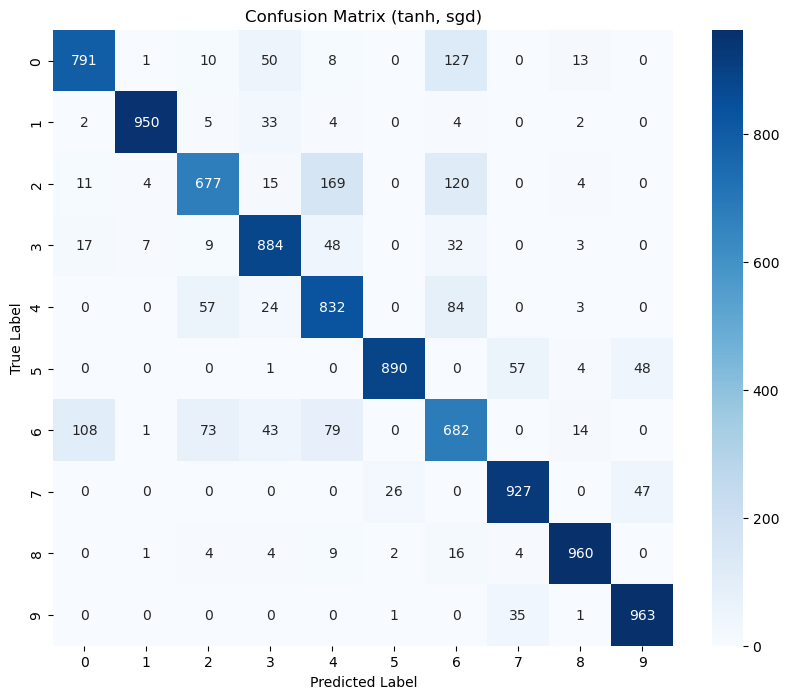

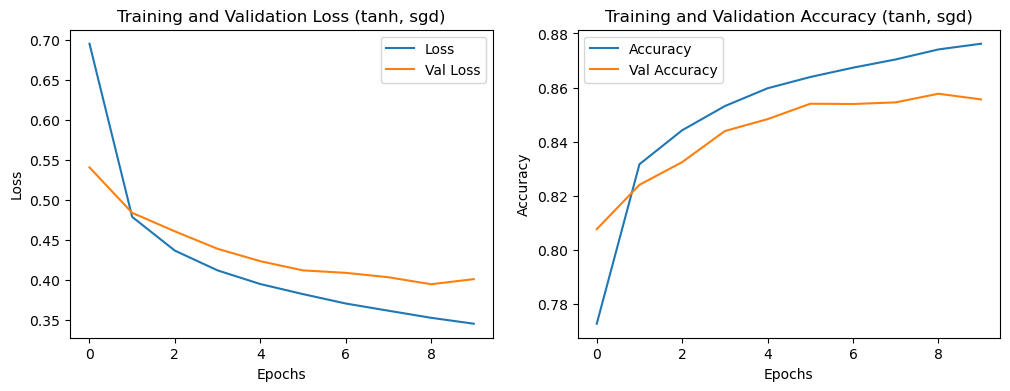


Training model with activation=tanh and optimizer=rmsprop
Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7834 - loss: 0.6050 - val_accuracy: 0.8356 - val_loss: 0.4578
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 966us/step - accuracy: 0.8642 - loss: 0.3780 - val_accuracy: 0.8410 - val_loss: 0.4175
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 962us/step - accuracy: 0.8750 - loss: 0.3389 - val_accuracy: 0.8689 - val_loss: 0.3699
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8863 - loss: 0.3078 - val_accuracy: 0.8640 - val_loss: 0.3693
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - accuracy: 0.8880 - loss: 0.2974 - val_accuracy: 0.8740 - val_loss: 0.3470
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 958us/step - accuracy: 0.8950 - loss: 0.2842 - val_accuracy: 0.8735 - val_loss: 0.3546
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 969us/step - accuracy: 0.8974 - loss: 0.2754 - val_accuracy: 0.8747 - val_loss: 0.3487
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 973us/step - accuracy: 0.9030 - loss: 0.2621 -

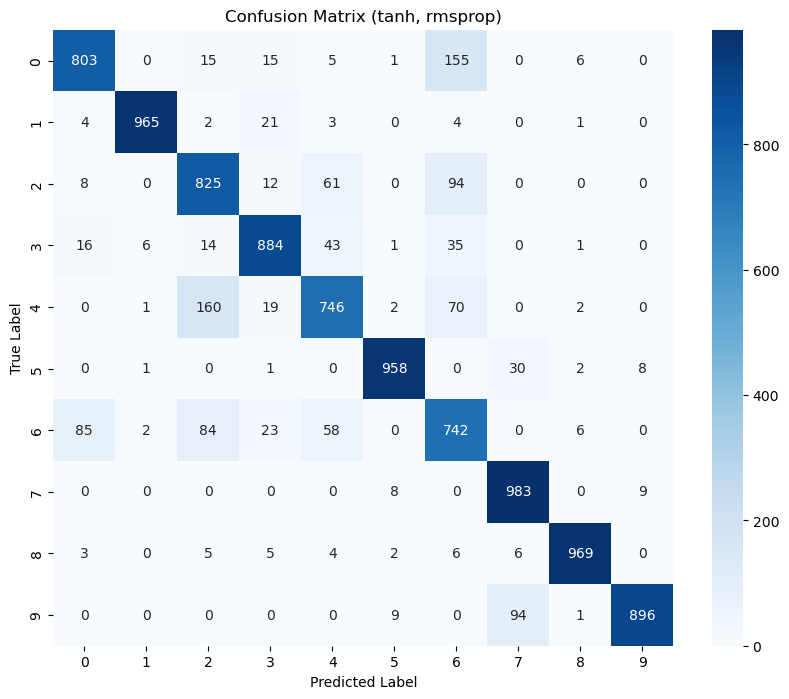

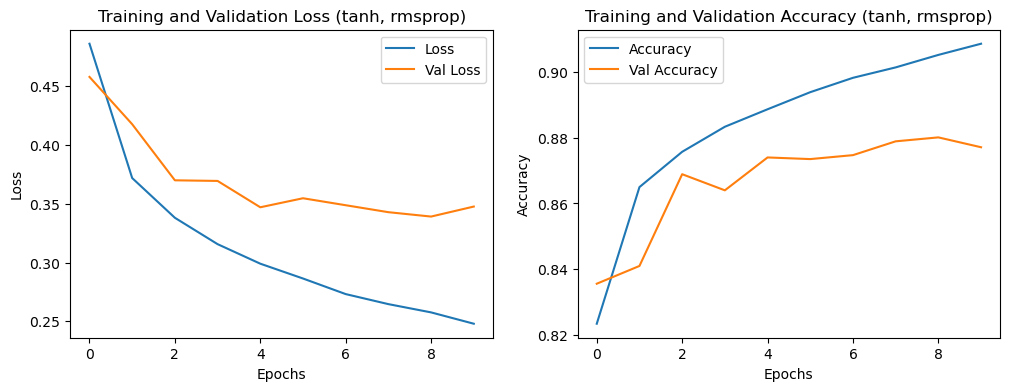

In [162]:
activations = ['relu', 'sigmoid', 'tanh']
optimizers = ['adam', 'sgd', 'rmsprop']

for activation in activations:
    for optimizer in optimizers:
        print(f'\nTraining model with activation={activation} and optimizer={optimizer}')
        model = create_model(activation=activation, optimizer=optimizer)
        history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

        # Evaluate the model
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
        print(f'Test accuracy with activation={activation} and optimizer={optimizer}: {test_acc:.4f}')

        # Generate the confusion matrix
        y_pred = np.argmax(model.predict(X_test), axis=1)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Plot the confusion matrix
        plt.figure(figsize=(10, 8))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Confusion Matrix ({activation}, {optimizer})')
        plt.show()

        # Plot training loss and accuracy
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Loss')
        plt.plot(history.history['val_loss'], label='Val Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.title(f'Training and Validation Loss ({activation}, {optimizer})')

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label='Accuracy')
        plt.plot(history.history['val_accuracy'], label='Val Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.title(f'Training and Validation Accuracy ({activation}, {optimizer})')
        plt.show()

### Inspecting the output

In [165]:
# Get the predicted probabilities for each class
predicted_probabilities = model.predict(X_test)

# Get the class with the highest probability
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# Check which items we got right / wrong
correct_indices = np.where(predicted_classes == y_test)[0]
incorrect_indices = np.where(predicted_classes != y_test)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step


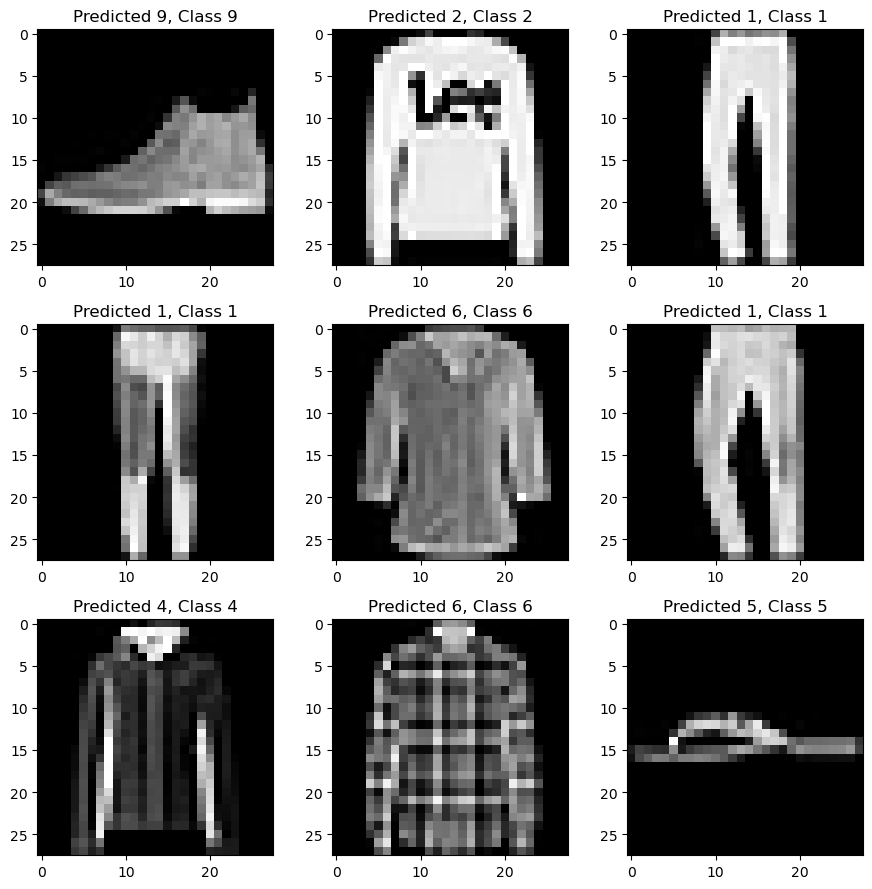

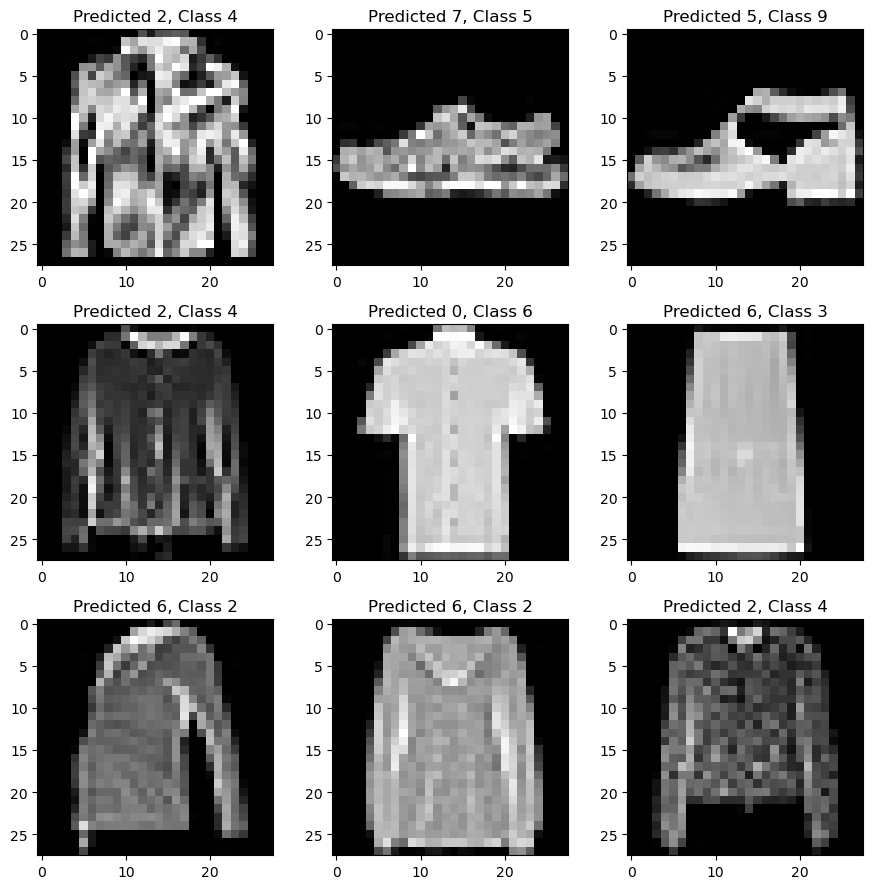

In [169]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

plt.tight_layout()

plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

plt.tight_layout()